<a href="https://colab.research.google.com/github/kous6942/Sales_prediction/blob/main/sales_prediction_using_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('advertising.csv')
df.head()

Saving advertising.csv to advertising.csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#stats on advertising dataset
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#observing the shape
df.shape

(200, 4)

In [7]:
#observing each item
df['Sales'].value_counts()

,count
Sales,
11.9,5
16.7,5
20.7,4
11.0,3
11.3,3
...,...
13.4,1
24.2,1
8.1,1


In [8]:
#checking for null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: xlabel='TV', ylabel='Sales'>

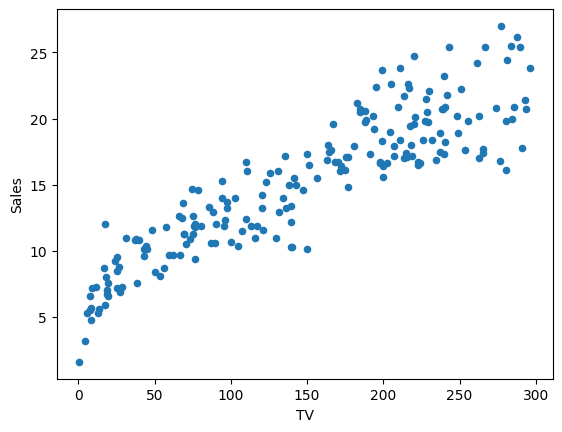

In [9]:
#visualizing the dataset using plots and graphs
#1.
df.plot(kind='scatter', x='TV', y='Sales')


<Axes: xlabel='Radio', ylabel='Sales'>

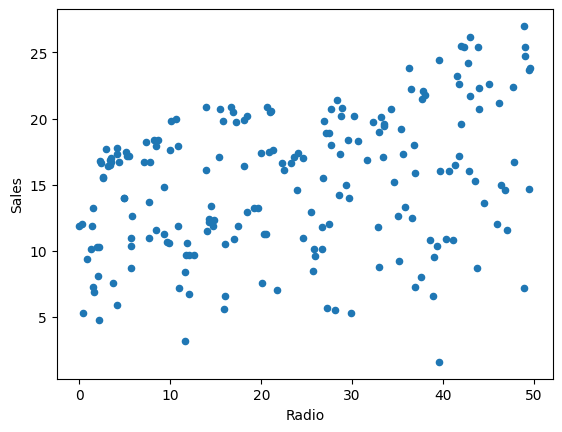

In [10]:
#2.
df.plot(kind='scatter', x='Radio', y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

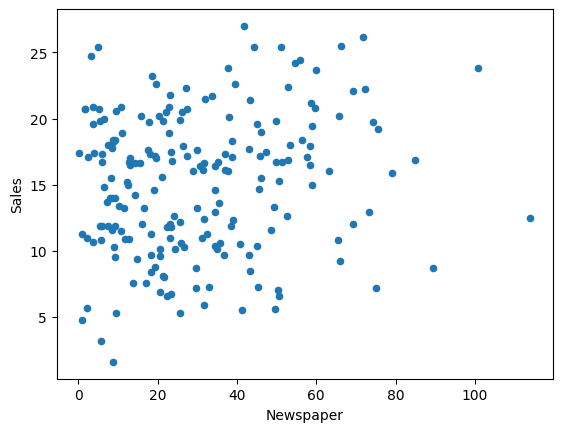

In [11]:
#3.
df.plot(kind='scatter', x='Newspaper', y='Sales')

<Axes: >

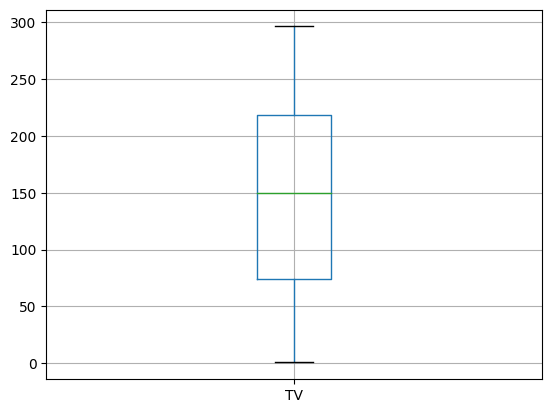

In [12]:

#creating boxplot for each category
df.boxplot(column=['TV'])

<Axes: >

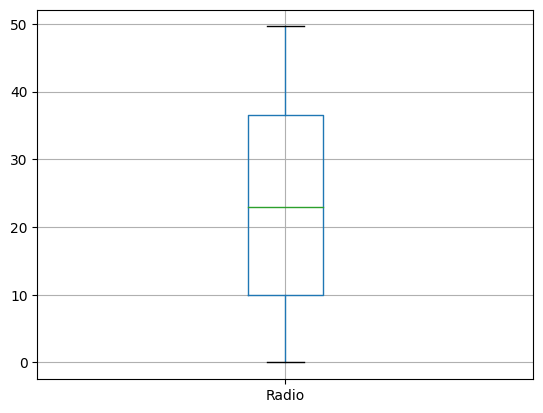

In [13]:
#boxplot for radio
df.boxplot(column=['Radio'])

<Axes: >

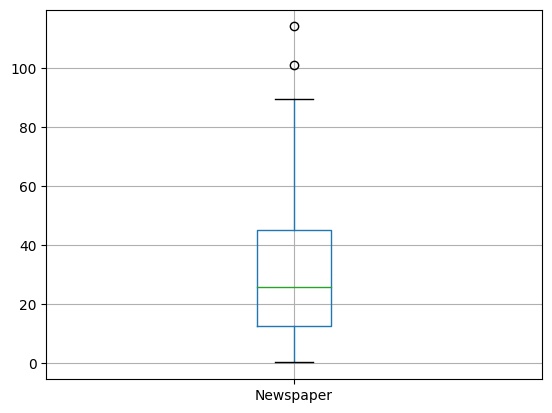

In [14]:
#boxplot for newspaper
df.boxplot(column=['Newspaper'])

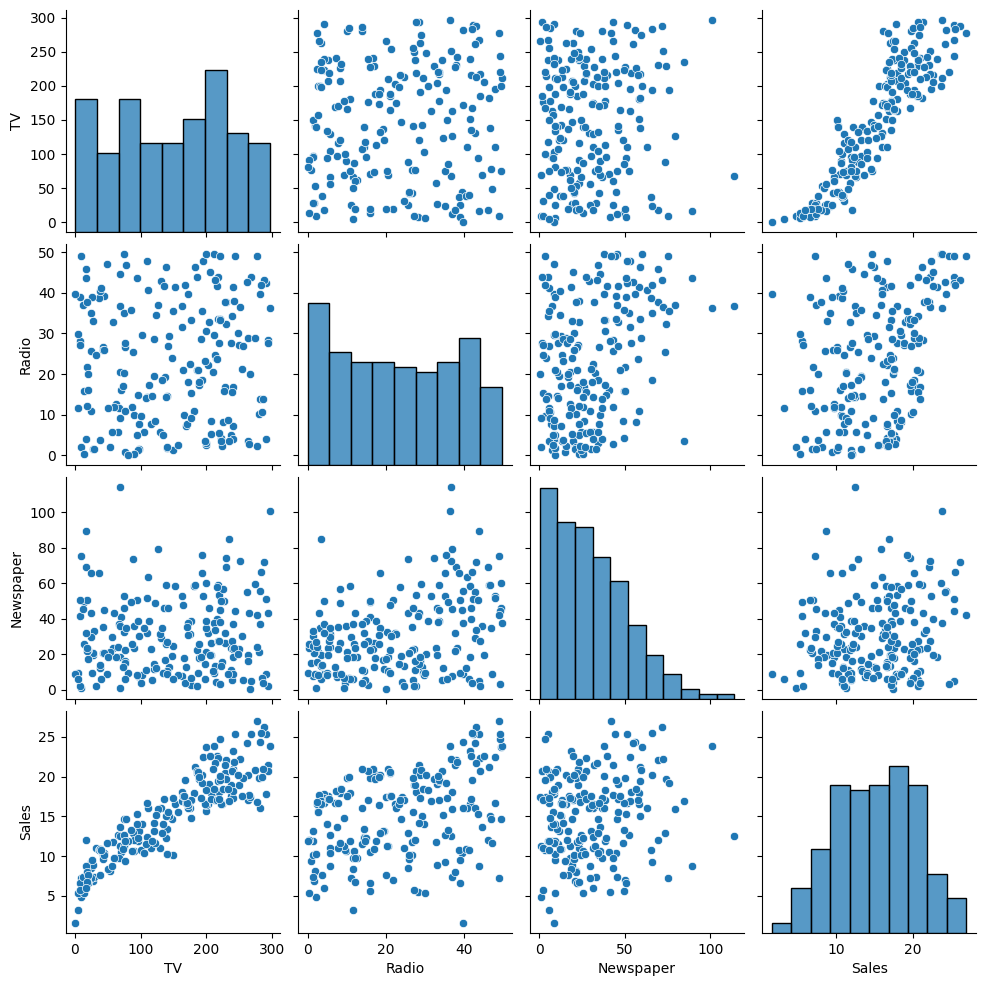

In [15]:
sns.pairplot(df)

<Axes: >

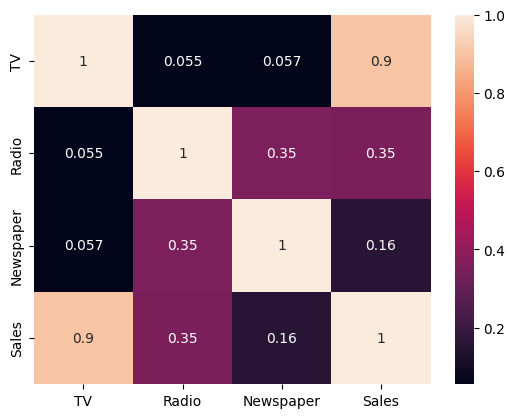

In [16]:
#creating correlationnfusion matrix
cm = df.corr()
sns.heatmap(cm, annot=True)

In [17]:
#using label converter to convert data into ml form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TV'] = le.fit_transform(df['TV'])
df['Newspaper'] = le.fit_transform(df['Newspaper'])
df['Radio'] = le.fit_transform(df['Radio'])
df['Sales'] = le.fit_transform(df['Sales'])

In [25]:

mean_squared_error = df[['TV', 'Radio', 'Newspaper']]  # Features: TV, Radio etc
n = df['Sales'] #define the target variable


# Split the data into training and testing sets (80% train, 20% test)
m_train, m_test, n_train, n_test = train_test_split(mean_squared_error,n, test_size=0.2, random_state=42)

#Linear regression
model = LinearRegression()

# Train the model
model.fit(m_train, n_train)



#printing to get the performance
print("Accuracy: ", model.score(m_test, n_test))

Accuracy:  0.9087222147365283


In [26]:
# Make predictions on the testing set
n_train_pred = model.predict(m_train)
n_test_pred = model.predict(m_test)

train_r2 = r2_score(n_train, n_train_pred)
test_r2 = r2_score(n_test, n_test_pred)

print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training R-squared: 0.898015403695868
Testing R-squared: 0.9087222147365283


In [30]:
#Testing an array on the model

X_new = np.array([[23.1, 37.8, 10]])
print(model.predict(X_new))

[14.83034826]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
